Importing libraries

NumPy: utilized for high-performance vector arithmetic.

Pandas: utilized for dataset management and cleaning.

Matplotlib: utilized for generating graphical visualizations.

KMeans: a custom built class implementation for the k nearest neighbors logic.

\* from shared: utils for performing repeating functions, such as loading data, calculating metrics, and more.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path

root_dir = Path().absolute().parent.parent
if str(root_dir) not in sys.path:
    sys.path.insert(0, str(root_dir))

from src.clustering.k_means import KMeans
from src.shared import *

I chose a classic dataset suitable for classification. \
The Mall Customers dataset fits this criterion well and is perfect for demonstrating the k-means clusterer.

General dataset statistics:

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


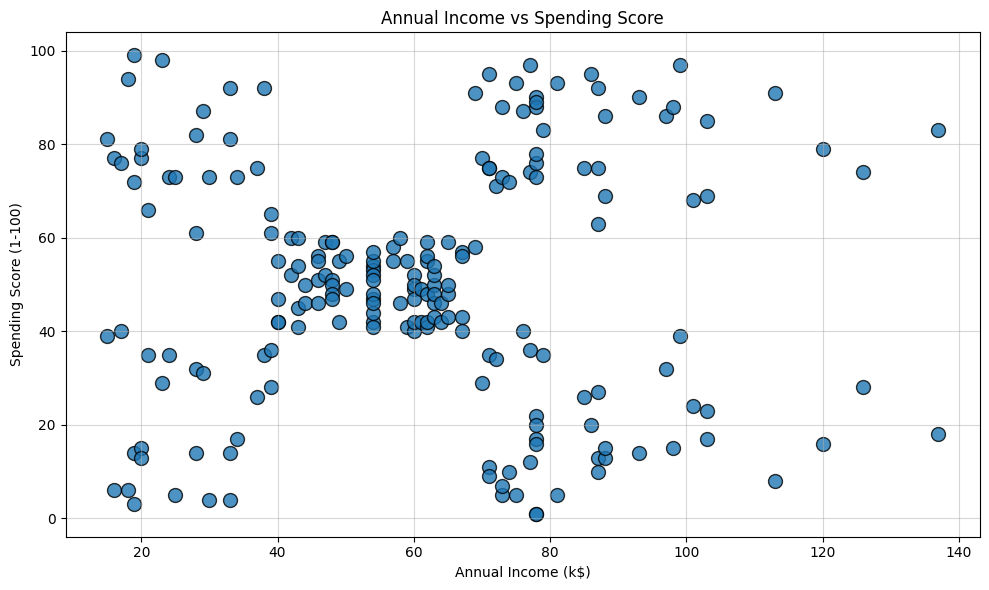

In [12]:
# --- 1. Load Data ---
df = load_dataset('mall_customers')


# --- 2. Data Cleaning ---
# dropping useless column
df_numeric = df.drop('CustomerID', axis=1)
# Convert Gender to 0 and 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# --- 3. Analysis ---
# Since there is no 'class' yet, we look at the overall stats
print("General dataset statistics:\n")
print(df_numeric.describe())


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

# Plotting Annual Income vs Spending Score
plt.scatter(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    edgecolors='black', 
    alpha=0.8,
    s=100,
)

plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

Clustering 200 customers into 4 groups

Cluster Sizes:
Cluster
0    60
2    52
1    44
3    44
Name: count, dtype: int64


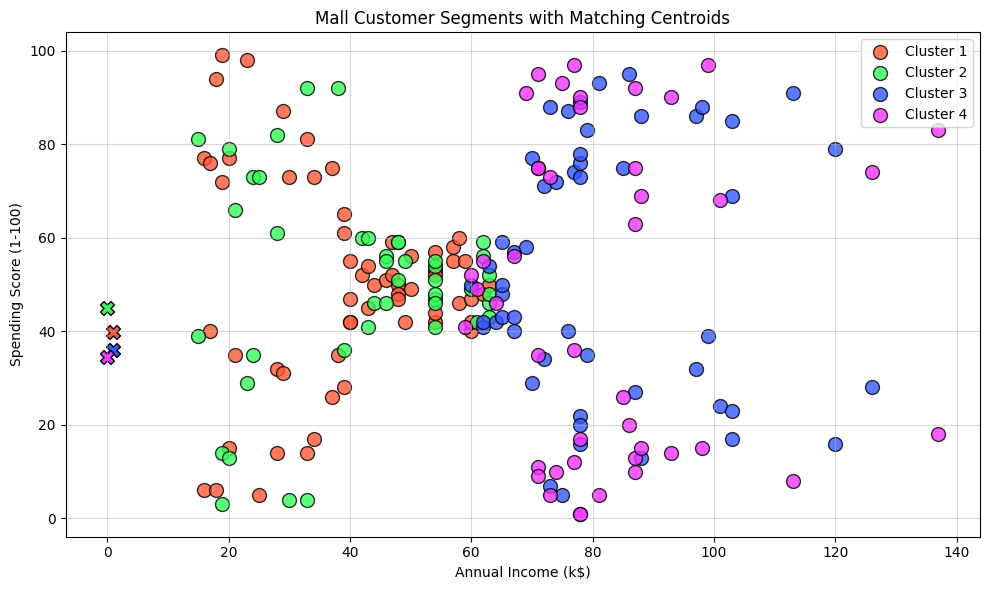

In [13]:
# --- 1. Select Features ---
X = df.values


# --- 2. Prepare Data ---
# Normalizing features to 0-1 range is a MUST to allow the model to treat all features appropriately no matter the scale.
X_min = X.min(axis=0)
X_range = X.max(axis=0) - X_min + 1e-15
X_scaled = (X - X_min) / X_range


# --- 3. Clustering ---
model = KMeans(k=4, max_iters=100)

print(f"Clustering {len(X_scaled)} customers into {model.k} groups")

model.fit(X_scaled)

clusters = model.predict(X_scaled)


# --- 4. Analysis ---
df['Cluster'] = clusters

print("\nCluster Sizes:")
print(df['Cluster'].value_counts())


# --- 5. Visualization ---
plt.figure(figsize=(10, 6))

colors = [
    '#FF5733', '#33FF57', '#3357FF', '#F333FF', '#FF33A1', 
    '#FFBD33', '#33FFF5', '#8D33FF', '#FF3333', '#33FF8D', 
    '#008080', '#DAA520', '#800000', '#000080', '#708090'
]

for i in range(model.k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(
        x=cluster_data['Annual Income (k$)'],
        y=cluster_data['Spending Score (1-100)'],
        label=f'Cluster {i+1}',
        edgecolors='black',
        c=colors[i],
        alpha=0.8,
        s=100
    )

centroids_orig = model.centroids * X_range + X_min

for i in range(model.k):
    plt.scatter(
        x=centroids_orig[i, 1],
        y=centroids_orig[i, 2],
        c=colors[i],
        marker='X',
        edgecolors='black',
        s=100
    )

plt.title("Mall Customer Segments with Matching Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# REMINDER: The model divides into clusters based on all features.
# Not only based on spending score and annual income.

# Centroids are marked with an X

Here I only used the two features you see, and divided the data into five clusters.

Clustering 200 customers into 5 groups


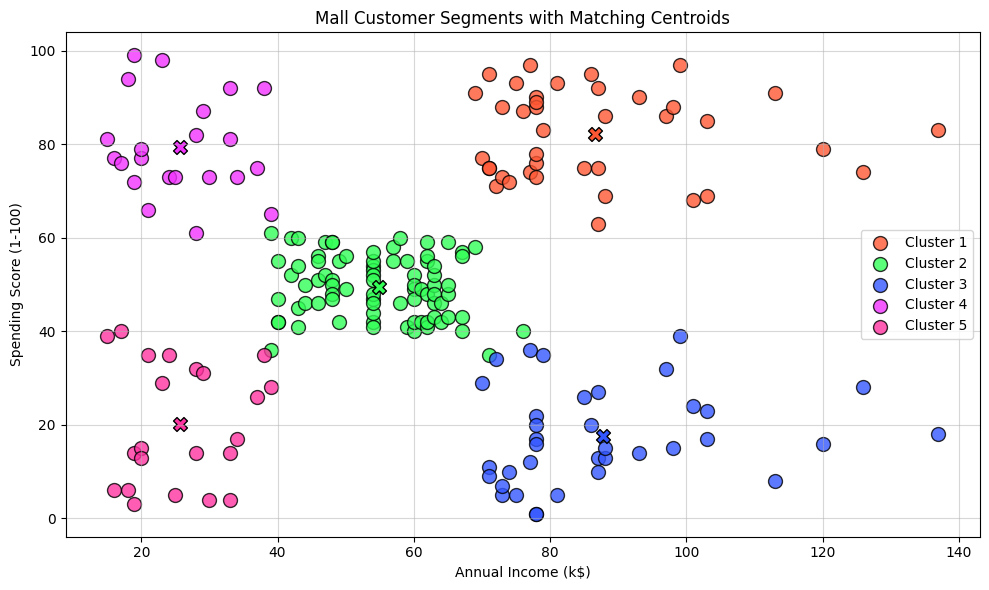

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

X_min = X.min(axis=0)
X_range = X.max(axis=0) - X_min + 1e-15
X_scaled = (X - X_min) / X_range


model = KMeans(k=5)

print(f"Clustering {len(X_scaled)} customers into {model.k} groups")

model.fit(X_scaled)

clusters = model.predict(X_scaled)

df['Cluster'] = clusters


plt.figure(figsize=(10, 6))

for i in range(model.k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(
        x=cluster_data['Annual Income (k$)'],
        y=cluster_data['Spending Score (1-100)'],
        label=f'Cluster {i+1}',
        edgecolors='black',
        c=colors[i],
        alpha=0.8,
        s=100
    )

centroids_orig = model.centroids * X_range + X_min

for i in range(model.k):
    plt.scatter(
        x=centroids_orig[i, 0],
        y=centroids_orig[i, 1],
        c=colors[i],
        marker='X',
        edgecolors='black',
        s=100
    )

plt.title("Mall Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Centroids are marked with an X